In [1]:
# Upload Kagle Token

from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [2]:
# Create the Kaggle folder & Move the Kaggle token file into it

import os
import shutil

kaggle_dir = '/root/.kaggle'

if not os.path.exists(kaggle_dir):
  os.makedirs(kaggle_dir)

source = '/content/kaggle.json'
destination = '/root/.kaggle/kaggle.json'

if os.path.exists(source):
  shutil.move(source, destination)

In [3]:
# Change permissions to the Kaggle token file

!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# Download the dataset from Kaggle site

# URL of the page: https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows

!kaggle datasets download -d harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows

Dataset URL: https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows
License(s): CC0-1.0
  0% 0.00/175k [00:00<?, ?B/s]
100% 175k/175k [00:00<00:00, 55.6MB/s]


In [5]:
# Unzip the file in the same Colab directory

!unzip /content/imdb-dataset-of-top-1000-movies-and-tv-shows.zip -d /content/

Archive:  /content/imdb-dataset-of-top-1000-movies-and-tv-shows.zip
  inflating: /content/imdb_top_1000.csv  


# Analysis

In [6]:
import pandas as pd

# Load the IMDB Movie Dataset
file_path = '/content/imdb_top_1000.csv'
imdb_data = pd.read_csv(file_path)

# Inspect the first few rows of the dataset to understand its structure and contents
imdb_data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [7]:
# Check for missing values
missing_values = imdb_data.isnull().sum()

# Convert relevant columns to appropriate data types
imdb_data['Released_Year'] = pd.to_numeric(imdb_data['Released_Year'], errors='coerce')
imdb_data['Runtime'] = imdb_data['Runtime'].str.replace(' min', '').astype(int, errors='ignore')
imdb_data['Gross'] = imdb_data['Gross'].str.replace(',', '').astype(float, errors='ignore')

# Fill missing numerical values with median and categorical with mode
imdb_data['Released_Year'].fillna(imdb_data['Released_Year'].median(), inplace=True)
imdb_data['Meta_score'].fillna(imdb_data['Meta_score'].median(), inplace=True)
imdb_data['Gross'].fillna(imdb_data['Gross'].median(), inplace=True)
imdb_data['Certificate'].fillna(imdb_data['Certificate'].mode()[0], inplace=True)

# Confirm changes and check data types
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   float64
 3   Certificate    1000 non-null   object 
 4   Runtime        1000 non-null   int64  
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     1000 non-null   float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          1000 non-null   float64
dtypes: float64(4), int64(2), object(10)
memory usage: 125.1+ KB


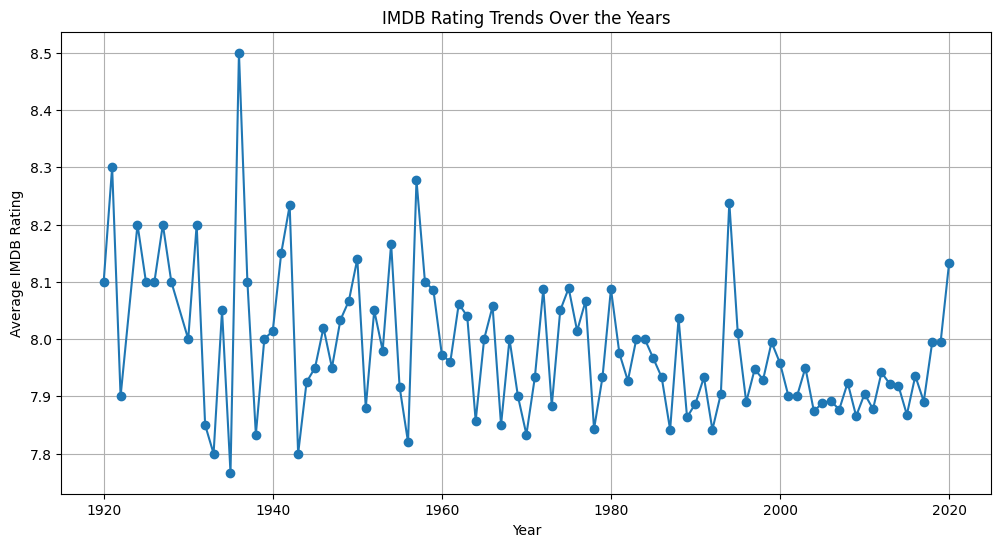

In [8]:
import matplotlib.pyplot as plt

# Group the data by Released_Year and calculate the mean IMDB_Rating
rating_trends = imdb_data.groupby('Released_Year')['IMDB_Rating'].mean().reset_index()

# Create a line plot for IMDB_Rating trends over the years
plt.figure(figsize=(12, 6))
plt.plot(rating_trends['Released_Year'], rating_trends['IMDB_Rating'], marker='o', linestyle='-')
plt.title('IMDB Rating Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Average IMDB Rating')
plt.grid(True)
plt.show()

<ipython-input-9-0e67be0d58cd>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


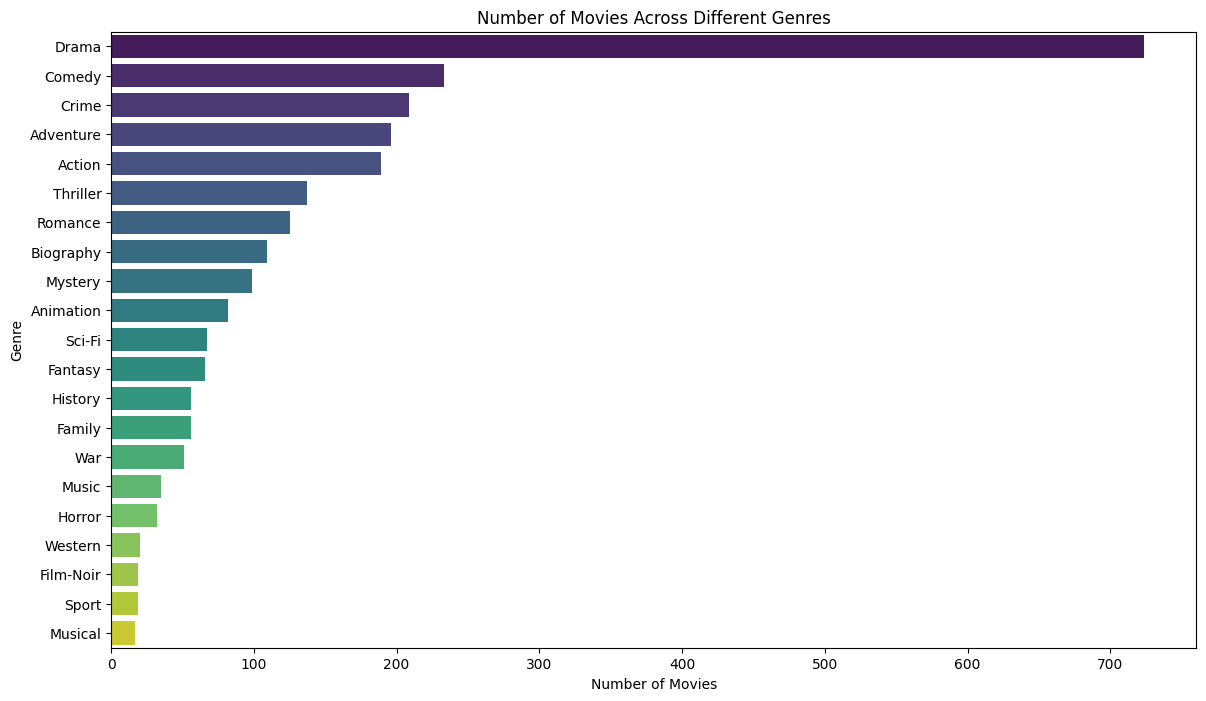

In [9]:
import seaborn as sns

# Split genres and count occurrences
genre_counts = imdb_data['Genre'].str.split(', ').explode().value_counts()

# Generate a Seaborn bar plot to compare the number of movies across different genres
plt.figure(figsize=(14, 8))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Number of Movies Across Different Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

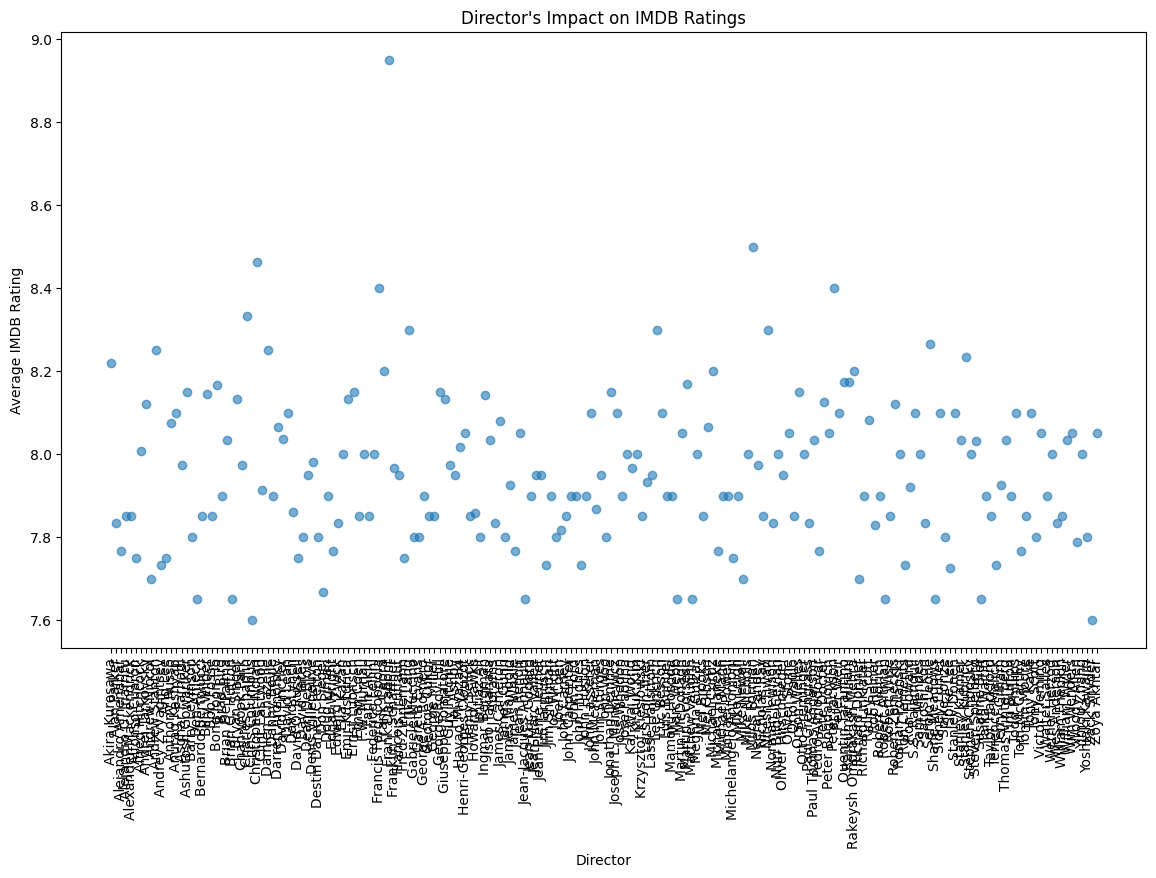

In [10]:
# Calculate average IMDB rating for each director
director_ratings = imdb_data.groupby('Director')['IMDB_Rating'].mean().reset_index()

# Filter to show directors with more than one movie to make the plot more meaningful
director_movie_counts = imdb_data['Director'].value_counts()
directors_with_multiple_movies = director_movie_counts[director_movie_counts > 1].index
filtered_director_ratings = director_ratings[director_ratings['Director'].isin(directors_with_multiple_movies)]

# Create a scatter plot to examine the relationship between directors and movie ratings
plt.figure(figsize=(14, 8))
plt.scatter(filtered_director_ratings['Director'], filtered_director_ratings['IMDB_Rating'], alpha=0.6)
plt.title("Director's Impact on IMDB Ratings")
plt.xlabel('Director')
plt.ylabel('Average IMDB Rating')
plt.xticks(rotation=90)
plt.show()

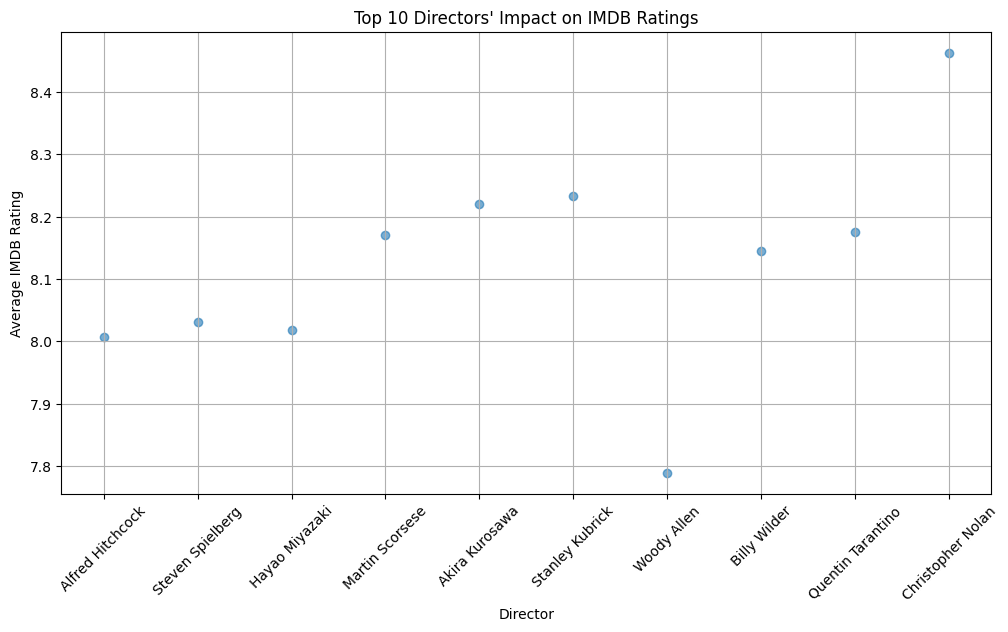

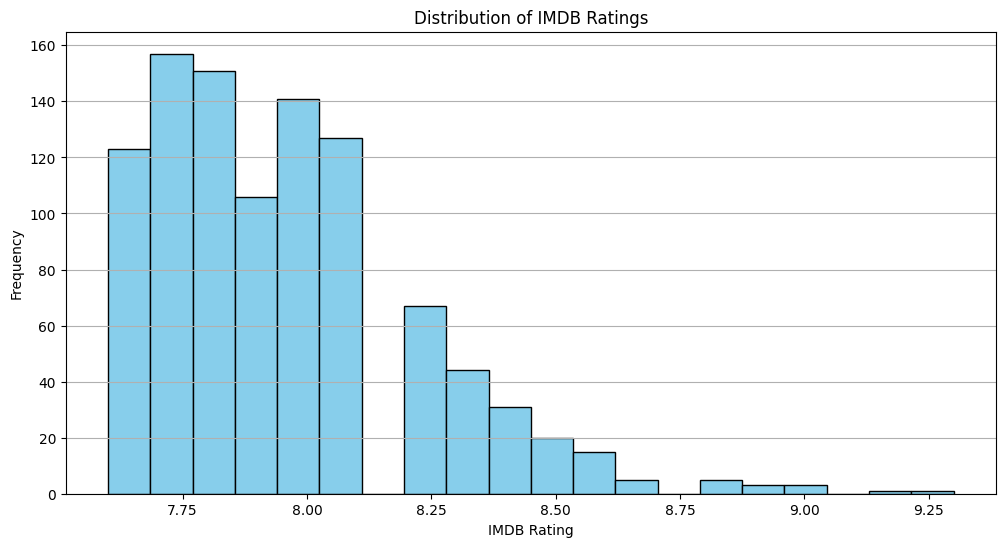

In [13]:
# Calculate average IMDB rating for each director
director_ratings = imdb_data.groupby('Director')['IMDB_Rating'].mean().reset_index()

# Count the number of movies per director
director_movie_counts = imdb_data['Director'].value_counts()

# Merge the two DataFrames
director_stats = director_ratings.merge(director_movie_counts.rename('Movie_Count'), left_on='Director', right_index=True)

# Sort the DataFrame by Movie_Count in descending order
sorted_directors = director_stats.sort_values('Movie_Count', ascending=False)

# Filter to show only the top 10 directors with the most movies
top_10_directors = sorted_directors.head(10)

# Create a scatter plot for the top 10 directors based on the number of movies
plt.figure(figsize=(12, 6))
plt.scatter(top_10_directors['Director'], top_10_directors['IMDB_Rating'], alpha=0.6)
plt.title("Top 10 Directors' Impact on IMDB Ratings")
plt.xlabel('Director')
plt.ylabel('Average IMDB Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Create a histogram of IMDB ratings to visualize the distribution
plt.figure(figsize=(12, 6))
plt.hist(imdb_data['IMDB_Rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of IMDB Ratings')
plt.xlabel('IMDB Rating')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


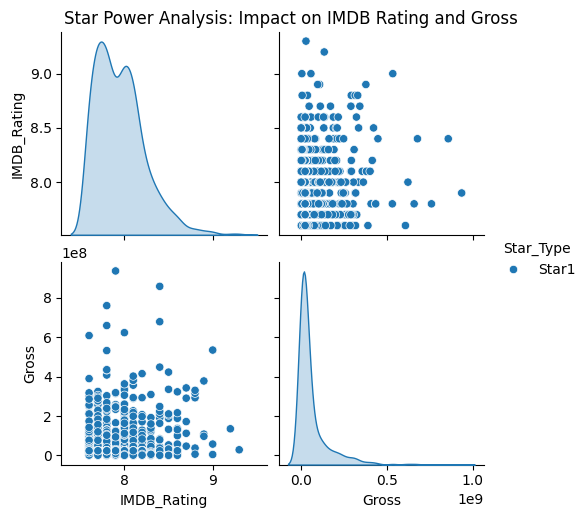

In [11]:
# Select relevant columns for pairplot analysis
stars_analysis = imdb_data[['Star1', 'IMDB_Rating', 'Gross']]

# Melt the dataframe to have 'Star' as a single column
melted_stars = pd.melt(stars_analysis, id_vars=['IMDB_Rating', 'Gross'], value_vars=['Star1'],
                       var_name='Star_Type', value_name='Star')

# Generate a Seaborn pairplot to explore relationships involving Stars, IMDB_Rating, and Gross
sns.pairplot(melted_stars, hue='Star_Type', markers='o')
plt.suptitle('Star Power Analysis: Impact on IMDB Rating and Gross', y=1.02)
plt.show()

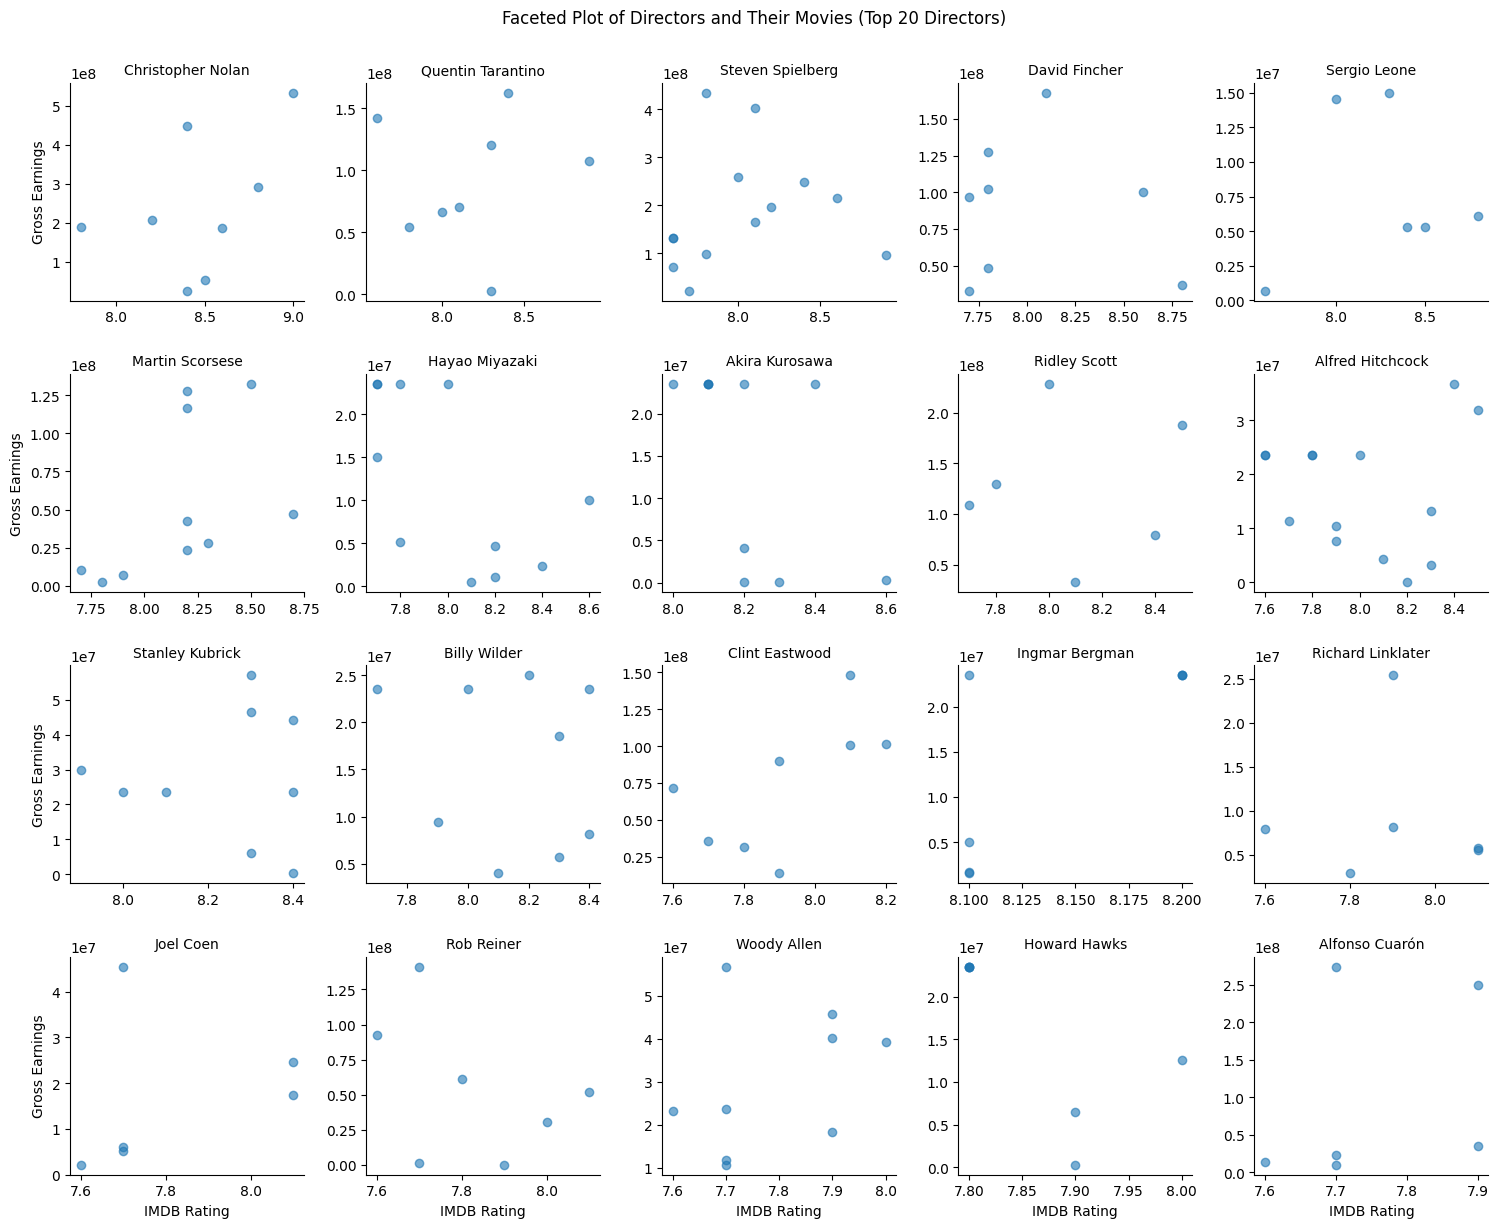

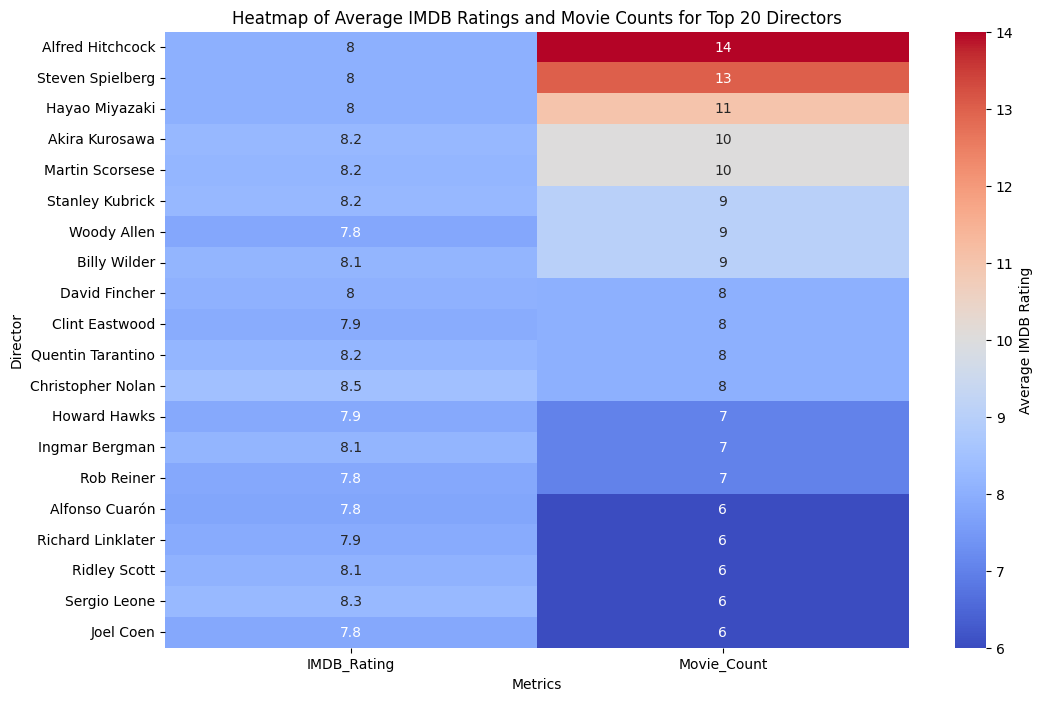

In [14]:
# For the faceted plot, we'll use Seaborn's FacetGrid to create multiple scatter plots based on different directors.

import seaborn as sns

# Limit to top 20 directors with the most movies for readability in the FacetGrid
top_20_directors = sorted_directors.head(20)

# Prepare a subset of the dataset with only the top 20 directors
top_director_data = imdb_data[imdb_data['Director'].isin(top_20_directors['Director'])]

# Create a FacetGrid for the top 20 directors
g = sns.FacetGrid(top_director_data, col='Director', col_wrap=5, height=3, sharex=False, sharey=False)
g.map(plt.scatter, 'IMDB_Rating', 'Gross', alpha=0.6)
g.set_titles("{col_name}")
g.set_axis_labels("IMDB Rating", "Gross Earnings")
g.fig.suptitle('Faceted Plot of Directors and Their Movies (Top 20 Directors)', y=1.02)
plt.show()

# For the heatmap, we will use the pivot table to show the number of movies and average ratings per director.

# Create a pivot table with the average IMDB Rating and count of movies per director
heatmap_data = imdb_data.pivot_table(index='Director', values=['IMDB_Rating', 'Series_Title'], aggfunc={'IMDB_Rating': 'mean', 'Series_Title': 'count'}).reset_index()
heatmap_data = heatmap_data.rename(columns={'Series_Title': 'Movie_Count'})

# Limit the heatmap to top 20 directors for readability
top_20_heatmap = heatmap_data[heatmap_data['Director'].isin(top_20_directors['Director'])].sort_values(by='Movie_Count', ascending=False)

# Create a heatmap of average IMDB Rating vs Movie Count for the top 20 directors
plt.figure(figsize=(12, 8))
sns.heatmap(top_20_heatmap.set_index('Director'), annot=True, cmap='coolwarm', cbar_kws={'label': 'Average IMDB Rating'})
plt.title('Heatmap of Average IMDB Ratings and Movie Counts for Top 20 Directors')
plt.xlabel('Metrics')
plt.ylabel('Director')
plt.show()
